In [6]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot as plt

In [7]:
names_df = pd.read_csv("data/IMDb names.csv")

In [8]:
names_df.head(5)

,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2,0,1,2
1,nm0000002,Lauren Bacall,Betty Joan Perske,174.0,Lauren Bacall was born Betty Joan Perske on Se...,"September 16, 1924 in The Bronx, New York City...",1924-09-16,"The Bronx, New York City, New York, USA","August 12, 2014 in New York City, New York, US...",2014-08-12,"New York City, New York, USA",stroke,Jason Robards (4 July 1961 - 10 September 196...,2,1,2,3
2,nm0000003,Brigitte Bardot,Brigitte Bardot,166.0,"Brigitte Bardot was born on September 28, 1934...","September 28, 1934 in Paris, France",1934-09-28,"Paris, France",NaN,NaN,NaN,NaN,Bernard d'Ormale (16 August 1992 - present)\n...,4,3,1,1
3,nm0000004,John Belushi,John Adam Belushi,170.0,"John Belushi was born in Chicago, Illinois, US...","January 24, 1949 in Chicago, Illinois, USA",1949-01-24,"Chicago, Illinois, USA","March 5, 1982 in Hollywood, Los Angeles, Calif...",1982-03-05,"Hollywood, Los Angeles, California, USA",acute cocaine and heroin intoxication,Judith Belushi-Pisano (31 December 1976 - 5 M...,1,0,0,0
4,nm0000005,Ingmar Bergman,Ernst Ingmar Bergman,179.0,"Ernst Ingmar Bergman was born July 14, 1918, t...","July 14, 1918 in Uppsala, Uppsala län, Sweden",1918-07-14,"Uppsala, Uppsala län, Sweden","July 30, 2007 in Fårö, Gotlands län, Sweden (...",2007-07-30,"Fårö, Gotlands län, Sweden",natural causes,Ingrid Bergman (11 November 1971 - 20 May 199...,5,4,5,8


In [9]:
names_df.describe()

,height,spouses,divorces,spouses_with_children,children
count,44681.000000,297705.000000,297705.000000,297705.000000,297705.000000
mean,175.007162,0.208690,0.071722,0.104866,0.196439
std,14.055496,0.570208,0.348499,0.349762,0.721257
min,20.000000,0.000000,0.000000,0.000000,0.000000
25%,168.000000,0.000000,0.000000,0.000000,0.000000
50%,175.000000,0.000000,0.000000,0.000000,0.000000
75%,183.000000,0.000000,0.000000,0.000000,0.000000
max,990.000000,12.000000,12.000000,6.000000,16.000000


/Users/Maxim.Vasilev/Library/Caches/pypoetry/virtualenvs/data-analysis-2021-HxUrdvxH-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/Maxim.Vasilev/Library/Caches/pypoetry/virtualenvs/data-analysis-2021-HxUrdvxH-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/Maxim.Vasilev/Library/Caches/pypoetry

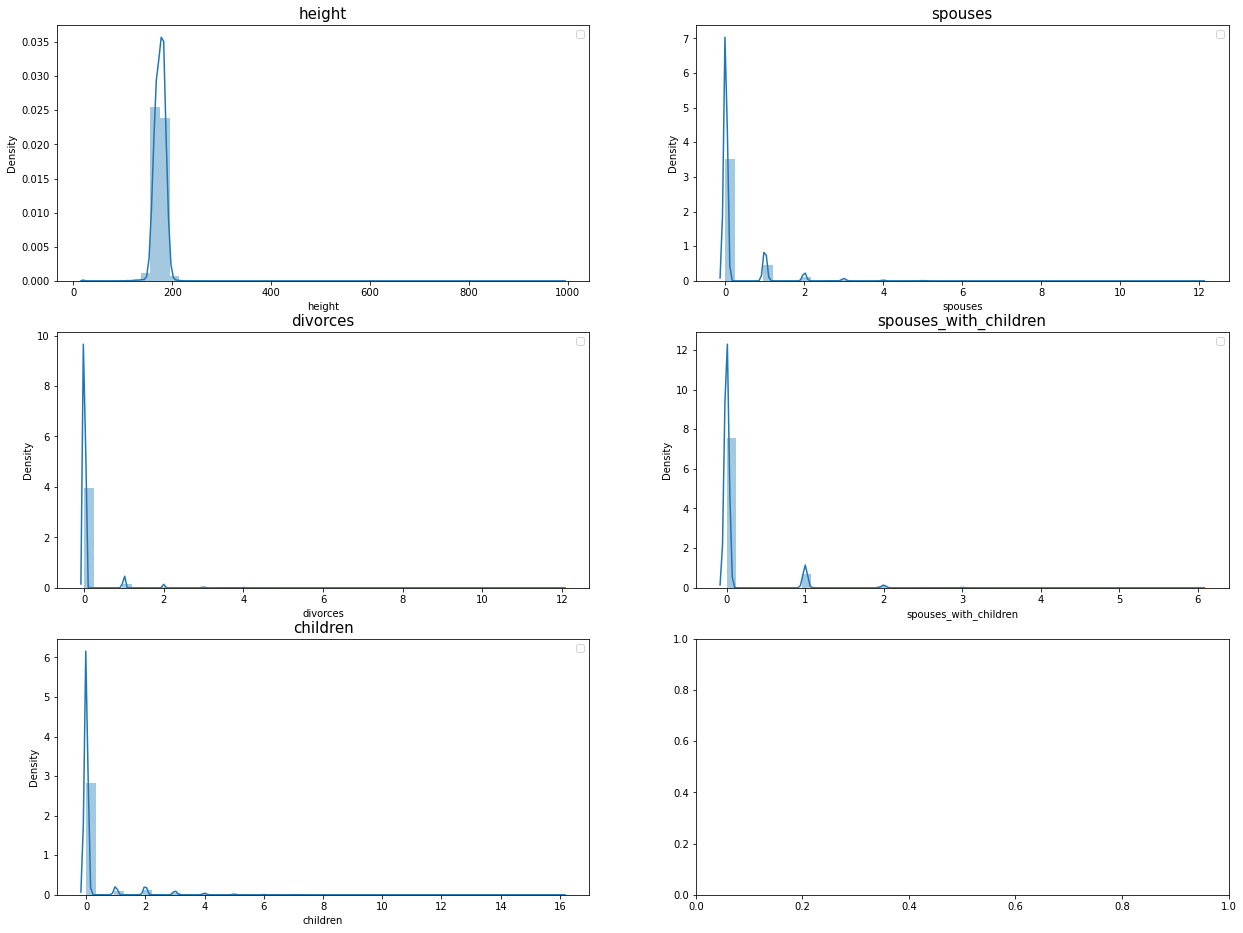

In [12]:
numerical_data = ["height", "spouses", "divorces", "spouses_with_children", "children"]

fig, ax = plt.subplots(3, 2, figsize=(21, 16))

for index, column in enumerate(numerical_data):
    row, col = index // 2, index % 2
    current_ax = ax[row, col]
    sns.distplot(ax=current_ax, a = names_df[column].dropna())
    current_ax.set_title(column, fontsize=15)
    current_ax.legend(loc='best')

plt.show()

In [14]:
names_df[names_df["spouses"] == 12]

,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
24491,nm0137226,Tahiyyah Karyuka,Badawiya Mohamed Karim Ali Sayed,NaN,Although her parents did not approve of her be...,"February 22, 1915 in Ismailia, Egypt",1915-02-22,"Ismailia, Egypt","September 20, 1999 in Cairo, Egypt",1999-09-20,"Cairo, Egypt",NaN,Mohammed Sultan (1940 - ?) (divorced)\nAntwan...,12,12,0,0
